# Bagging 

***Temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.***

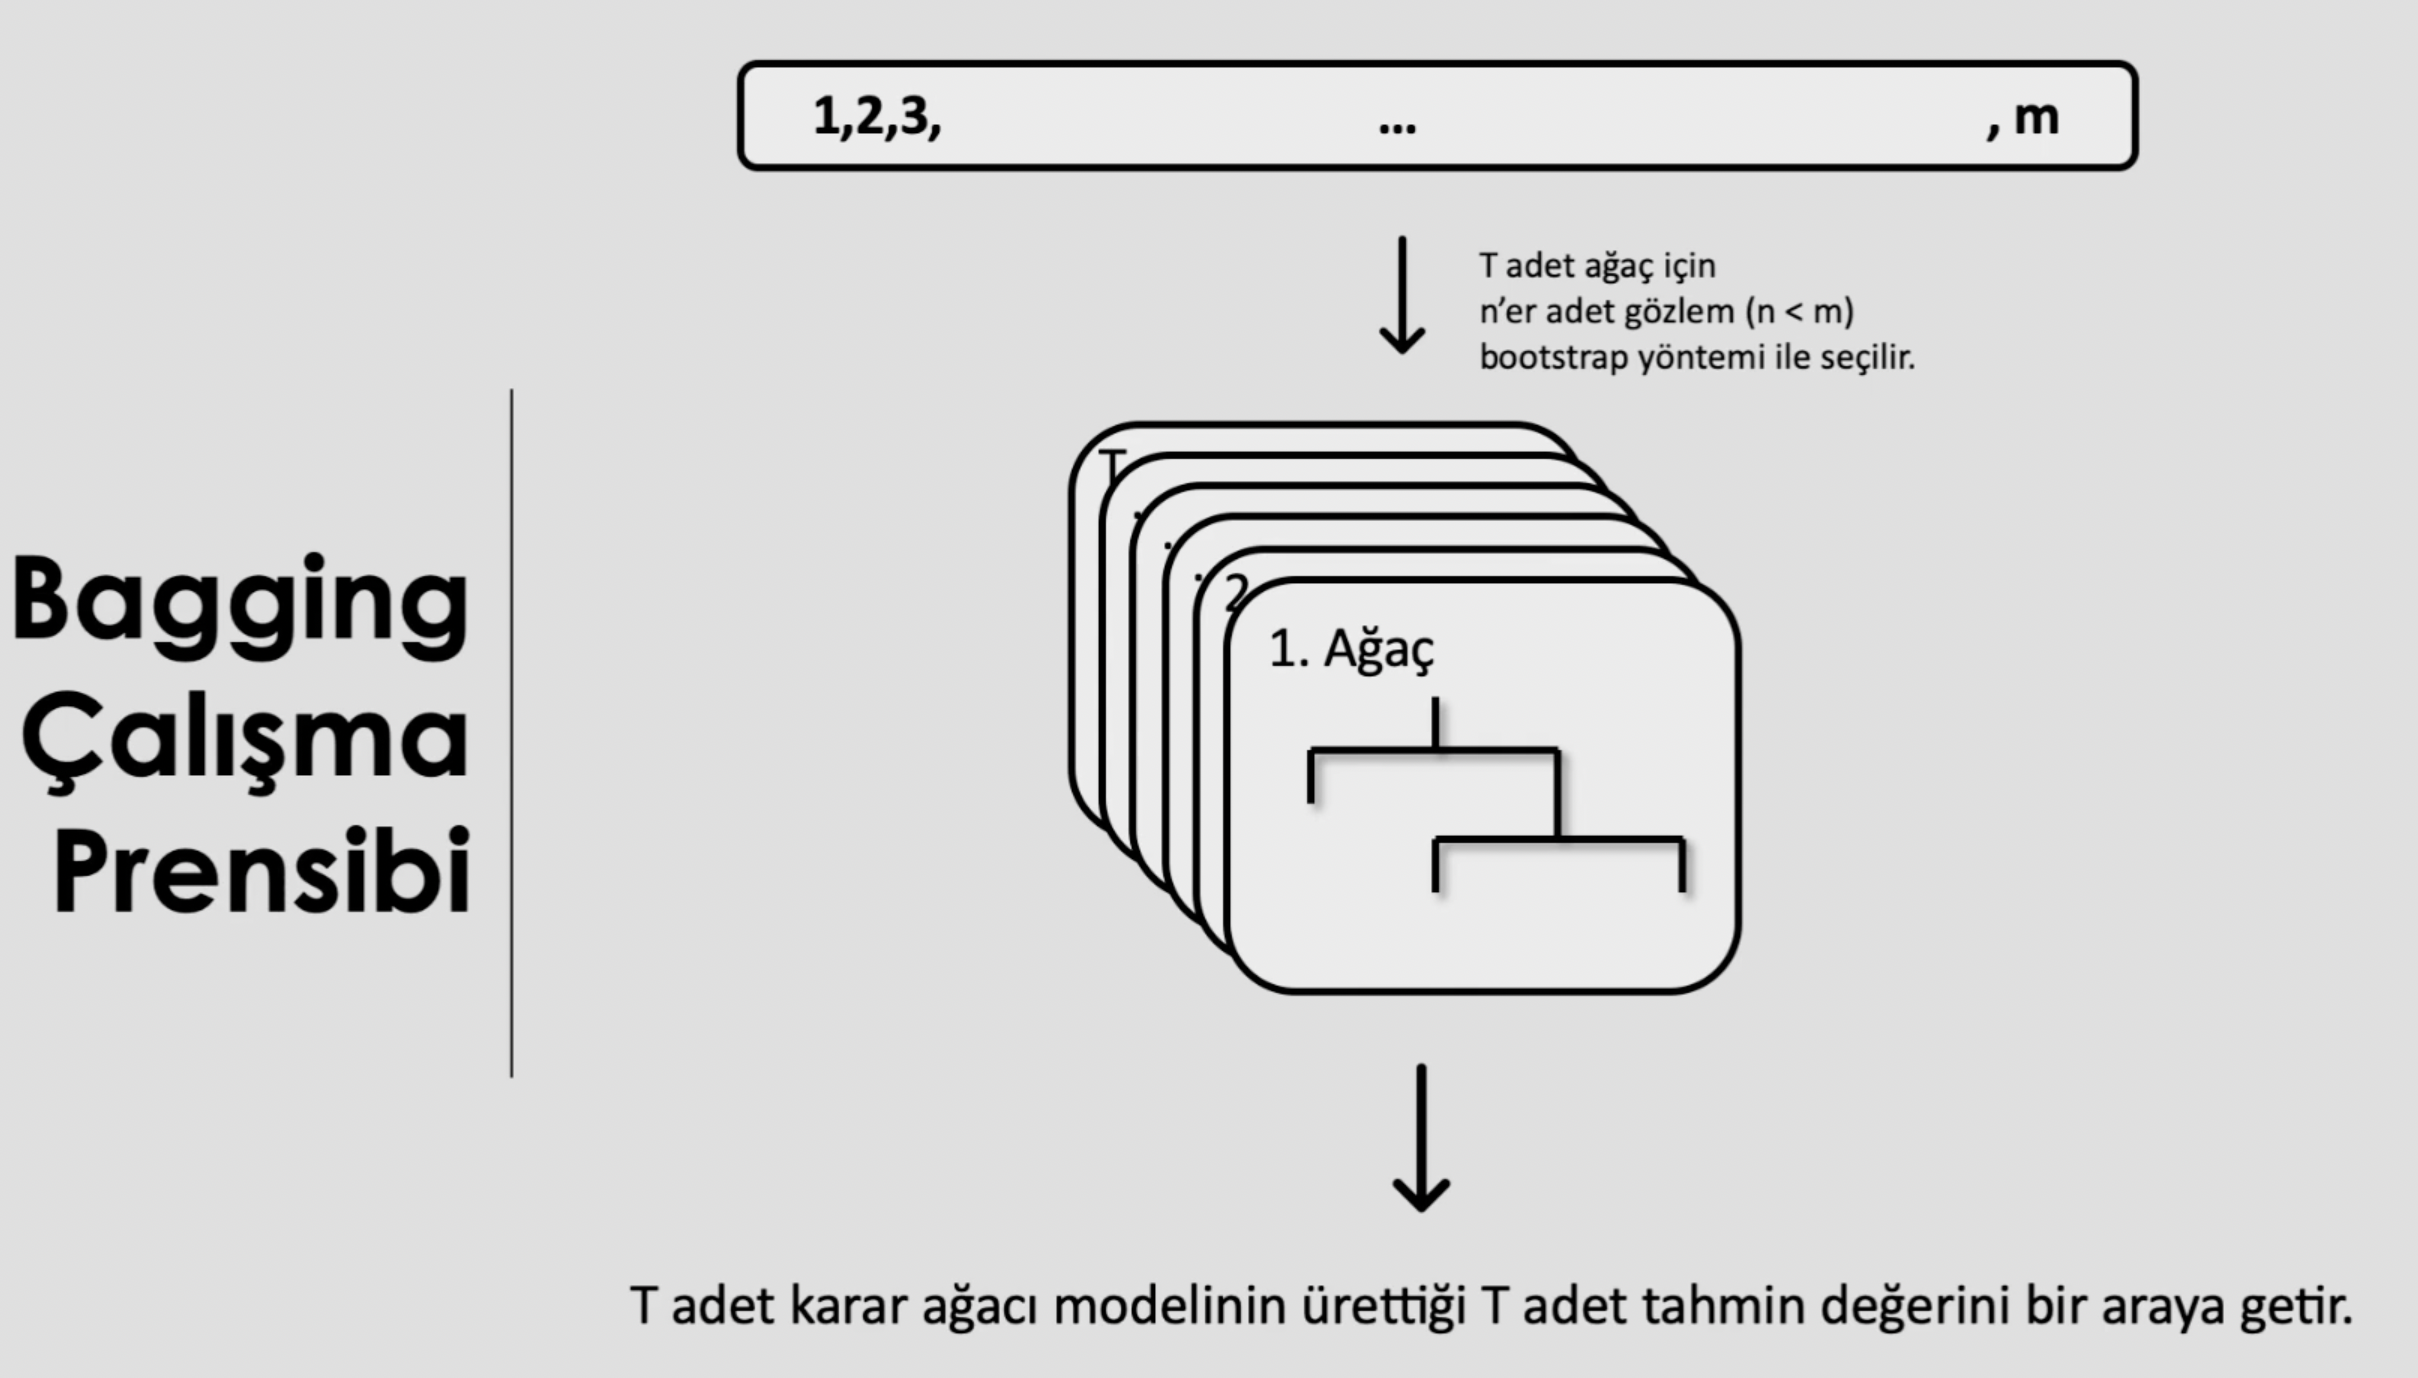

***Bootstrap: Rastgele örnekleme yöntemidir.***

# Model

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [4]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [5]:
bag_model.n_estimators

10

In [6]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=543613315),
 DecisionTreeRegressor(random_state=7070023),
 DecisionTreeRegressor(random_state=507341514),
 DecisionTreeRegressor(random_state=1367886052),
 DecisionTreeRegressor(random_state=1694925368),
 DecisionTreeRegressor(random_state=1855135429),
 DecisionTreeRegressor(random_state=128728424),
 DecisionTreeRegressor(random_state=1897526604),
 DecisionTreeRegressor(random_state=1565636866),
 DecisionTreeRegressor(random_state=1863207522)]

In [12]:
bag_model.estimators_samples_

[array([ 55,  39, 103, 160, 147, 159, 146, 186, 121, 179,  35, 184, 160,
         96, 118,  27, 119,  91,  29, 181,  17, 196, 125, 119, 186, 132,
        172, 122,  63,  90, 110,  51, 193,  80,  65, 140,  76, 194,  65,
         29,  34, 161, 106,  44, 174, 114, 101,  24,  77,  86,  10, 128,
         36,  71, 103,  19,  77, 136, 148,  81,  68,  52,  77,  23,  93,
         29, 153, 171, 167,  16, 168, 155, 133,  49, 120,  71, 143,  87,
        144, 111, 183,  42,  50, 110,  59,  22, 115,   9, 131, 163, 156,
        167,  37,   6,  15,  59,  80, 162,  22,  11,  27,  58, 148,  33,
         10,  69,  14,  17,  79, 138, 156, 159, 124,  75, 149, 178,  26,
        142,  61,  40, 109, 159,  95, 137,  88, 162, 110, 180, 190,  41,
         85,  93, 156,  97, 125, 120,  90,  69,  34, 118, 145, 113, 196,
        143,  87, 187, 191,  35, 138,  46, 113,  52, 156, 185, 112, 148,
        172, 112,   8,  24,  53,  70,  29, 188,  30, 123,  15, 192, 174,
         35, 191, 132,  67, 113,   0, 107, 122, 141

In [13]:
bag_model.estimators_features_

[array([ 3,  4,  7, 14,  1, 10, 18,  0,  8, 14,  4, 14,  3,  4,  3,  2, 17,
        15,  7]),
 array([ 7, 12,  9, 10, 15,  5,  7, 13,  3,  5, 17,  2,  2, 17, 10,  5, 12,
        12, 15]),
 array([10,  5,  2,  9, 10, 17,  2,  7,  5, 12,  5,  2, 15, 16, 18,  2,  6,
         7, 12]),
 array([ 4,  5, 11,  5, 16,  3, 13, 16, 17, 10,  4, 11, 13,  6, 16,  3,  5,
         1, 12]),
 array([14, 11, 10, 11, 15, 14,  0,  0, 15, 10,  2,  9, 10,  7, 10, 14, 15,
        11,  4]),
 array([ 5, 15,  6, 17, 11,  9, 14,  6, 16,  9, 17, 10, 10, 13, 13, 10,  9,
        13,  0]),
 array([ 8,  9,  6,  6, 13, 11,  3,  6,  0, 11, 15, 13, 17,  5,  1,  4,  1,
        16,  9]),
 array([12,  1, 16, 15,  9, 14,  4,  3, 11,  4, 11, 13, 14,  7, 15,  2, 16,
        17,  9]),
 array([ 2,  4,  8,  4,  0,  0, 16, 14,  9,  2, 18, 18, 14, 18, 16, 12, 12,
         1,  3]),
 array([ 2, 17, 11, 18,  8,  2, 14, 17, 18,  0, 14, 14, 11,  3, 13, 12, 14,
        18, 15])]

In [11]:
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=543613315)

# Tahmin

In [14]:
y_pred = bag_model.predict(X_test)

In [15]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.7496780960419

In [34]:
yedi_y_pred = bag_model.estimators_[7].fit(X_train, y_train).predict(X_test)

In [35]:
np.sqrt(mean_squared_error(y_test,yedi_y_pred))

516.0960454662866

# Model Tuning

In [36]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [37]:
bag_params = {"n_estimators": range(2,20)}

In [38]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [39]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [40]:
bag_cv_model.best_params_

{'n_estimators': 17}

In [41]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [42]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [43]:
y_pred = bag_tuned.predict(X_test)

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred))

346.457987188104